In [ ]:
# Load the Drive helper and mount
from google.colab import drive
import matplotlib.pyplot as plt

# This will prompt for authorization.
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import pickle
import random

# filename = "dataset-no-flip"
size = 64
filename = "dataset"
with open("/drive/My Drive/dataset/" + filename + ".pickle", "rb") as f:
    dataset = list(pickle.load(f))

def input_dataset():
    for count_x, each_game in enumerate(list(dataset)):
        for count_y, each_move in enumerate(each_game):
            # print(each_move)
            data = ([each_move[1][2]/3500]) # roughly normalized avg rating
            move_evals = sorted(each_move[1][0])

            data.extend(move_evals)
            if len(data) < size:
                data.extend([0]*(size-len(data)))
            # print(len(move_evals))
            assert len(data[:size]) == size
            yield data[:size]

def gen_label():
    for count_x, each_game in enumerate(list(dataset)):
        for count_y, each_move in enumerate(each_game):
            args = np.argsort(each_move[1][0])
            new_index = list(args).index(each_move[0])
            if new_index < size:
                yield new_index
            else:
                yield size # last one is reserved to denote out of space

input_data = np.array(list(input_dataset()))
labels = np.array(list(gen_label()))

In [ ]:
# print(list(input_dataset()))
model = keras.Sequential([
    keras.layers.Dense(size+1, activation='relu'),
    # keras.layers.Dense(size, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(size//2), # maybe add l2 regularization
    keras.layers.Dense(size+1)
    # keras.layers.Dense(size)

    # keras.layers.Dense(128, activation='sigmoid')
])

# model.compile(optimizer='adam',
# keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, amsgrad=False),
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(input_data, 
          labels, 
          epochs=50, 
          validation_split=0.1,
          batch_size=32)
          # batch_size=64)
model.summary()

model.save("/drive/My Drive/dataset/" + filename + ".h5")

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

37936/37936 [==============================] - 72s 2ms/step - loss: 299.7613 - accuracy: 0.0508 - val_loss: 221.8576 - val_accuracy: 0.0478
Epoch 2/50
37936/37936 [==============================] - 70s 2ms/step - loss: 99.3497 - accuracy: 0.0546 - val_loss: 161.3771 - val_accuracy: 0.0563
Epoch 3/50
37936/37936 [==============================] - 70s 2ms/step - loss: 85.0335 - accuracy: 0.0551 - val_loss: 108.2248 - val_accuracy: 0.0586
Epoch 4/50
37936/37936 [==============================] -

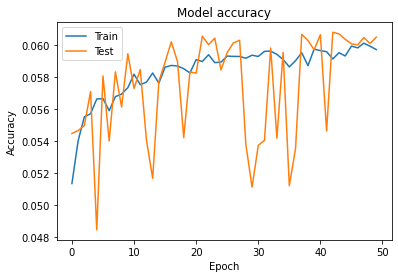

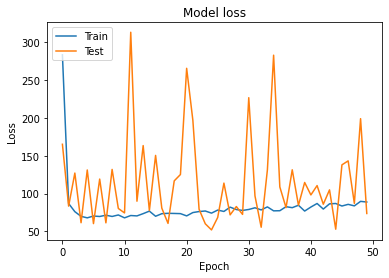

In [ ]:
## From Keras docs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()